In [1]:
from nanomesh import NanoMesher
from nanomesh.utils import show_slice, show_volume
from nanomesh import sitk_filter

The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.


In [2]:
data_name = 'PG_EBAR_18072017_CH_6C_s15_10nm_rec_sa7_1024_1024_2048.vol'
info_name = 'PG_EBAR_18072017_CH_6C_s15_10nm_rec_sa7_1024_1024_2048.vol.info'

In [3]:
nmesh = NanoMesher()
nmesh.load_bin(data_name, info_name, create_image=False)

FileNotFoundError: PG_EBAR_18072017_CH_6C_s15_10nm_rec_sa7_1024_1024_2048.vol.info

In [52]:
import matplotlib.pyplot as plt

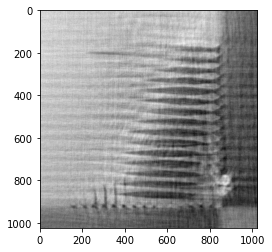

In [53]:
plt.imshow(nmesh.volume.data[0,:,:])

In [54]:
nmesh.create_image(data = nmesh.volume.data[900:1100,600:800,600:800])

In [55]:
show_slice(nmesh.volume.img,'z')

interactive(children=(IntSlider(value=99, description='z', max=199), Output()), _dom_classes=('widget-interact…

In [9]:
nmesh.apply_gaussian_filtering(sigma=5.)
show_slice(nmesh.volume.img,'z')

interactive(children=(IntSlider(value=99, description='z', max=199), Output()), _dom_classes=('widget-interact…

In [56]:
import SimpleITK as sitk
data = sitk.GetArrayFromImage(nmesh.volume.img)
data.tofile('sample_data.vol')

In [10]:
show_volume(nmesh.volume.img)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…

In [11]:
seg_bin = sitk_filter.binary_threshold(nmesh.volume.img, lowerThreshold=0, upperThreshold=125, insideValue=1, outsideValue=0)
show_slice( (nmesh.volume.img, seg_bin), dim='z', title="Binary Thresholding")

interactive(children=(IntSlider(value=99, description='z', max=199), Output()), _dom_classes=('widget-interact…

In [12]:
show_volume(seg_bin)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…